Credit Card Fraud Detection

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier
from pylab import rcParams
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score
from warnings import filterwarnings
filterwarnings(action='ignore')

Import Dataset

In [2]:
import os
os.getcwd()

'C:\\Users\\KARAN'

In [3]:
df = pd.read_csv(r"C:\Users\KARAN\OneDrive\Desktop\Codsoft\creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.describe().T.head(32)

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# distribution of legal transactions & fraud transactions
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
# separating the data for analysis
legal = df[df.Class == 0]
fraud = df[df.Class == 1]

In [10]:
print(legal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [11]:
legal=legal.sample(n=492)

In [12]:
df=pd.concat([legal,fraud],axis=0)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3181,2755.0,1.232553,-0.333329,1.168468,0.160586,-1.255172,-0.475245,-0.729003,0.067757,1.152804,...,-0.127672,-0.175000,0.072773,0.462933,0.101815,0.992043,-0.035163,0.014190,0.48,0
65919,51804.0,1.327112,-0.697588,0.517973,-0.560829,-1.082218,-0.219638,-0.717832,0.058064,-0.595353,...,-0.656879,-1.337300,0.133385,-0.005917,0.082747,0.828040,-0.047045,-0.001326,14.95,0
244302,152292.0,1.782514,-0.466211,-2.156858,0.215513,0.464962,-0.241947,0.149579,-0.069111,0.862636,...,-0.180760,-0.597916,-0.070761,-1.272899,-0.022584,-0.049131,-0.036063,-0.019818,145.96,0
69256,53340.0,1.198197,0.127701,0.670044,1.324372,-0.590452,-0.576259,-0.092031,-0.034984,0.614034,...,-0.266643,-0.625697,0.039133,0.349822,0.493275,-0.523058,0.033130,0.025101,5.89,0
38003,39206.0,-1.549428,1.481194,1.583158,0.382863,-0.947182,0.519548,-2.083415,-5.157716,-0.364615,...,-2.335160,1.554858,0.101872,0.769994,-0.379438,0.382157,0.094138,0.198000,29.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


DATA VISUALIZATION

In [13]:
df["Class"].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [14]:
# statistical measures of the data
legal.Amount.describe()

count     492.000000
mean       92.561321
std       264.173145
min         0.000000
25%         6.245000
50%        19.005000
75%        61.375000
max      3828.040000
Name: Amount, dtype: float64

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Bar Graph 

<Axes: xlabel='Class', ylabel='count'>

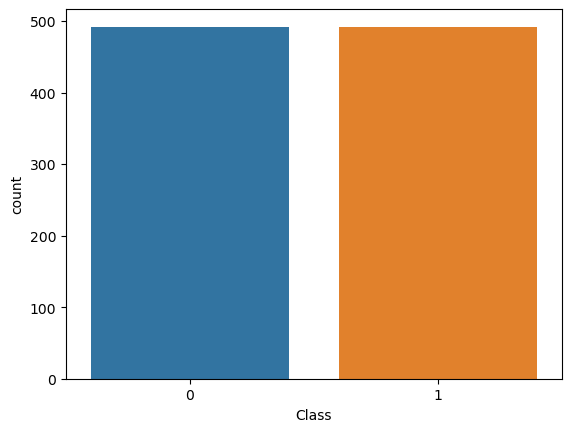

In [16]:
sns.countplot(x= df["Class"])

Histogram

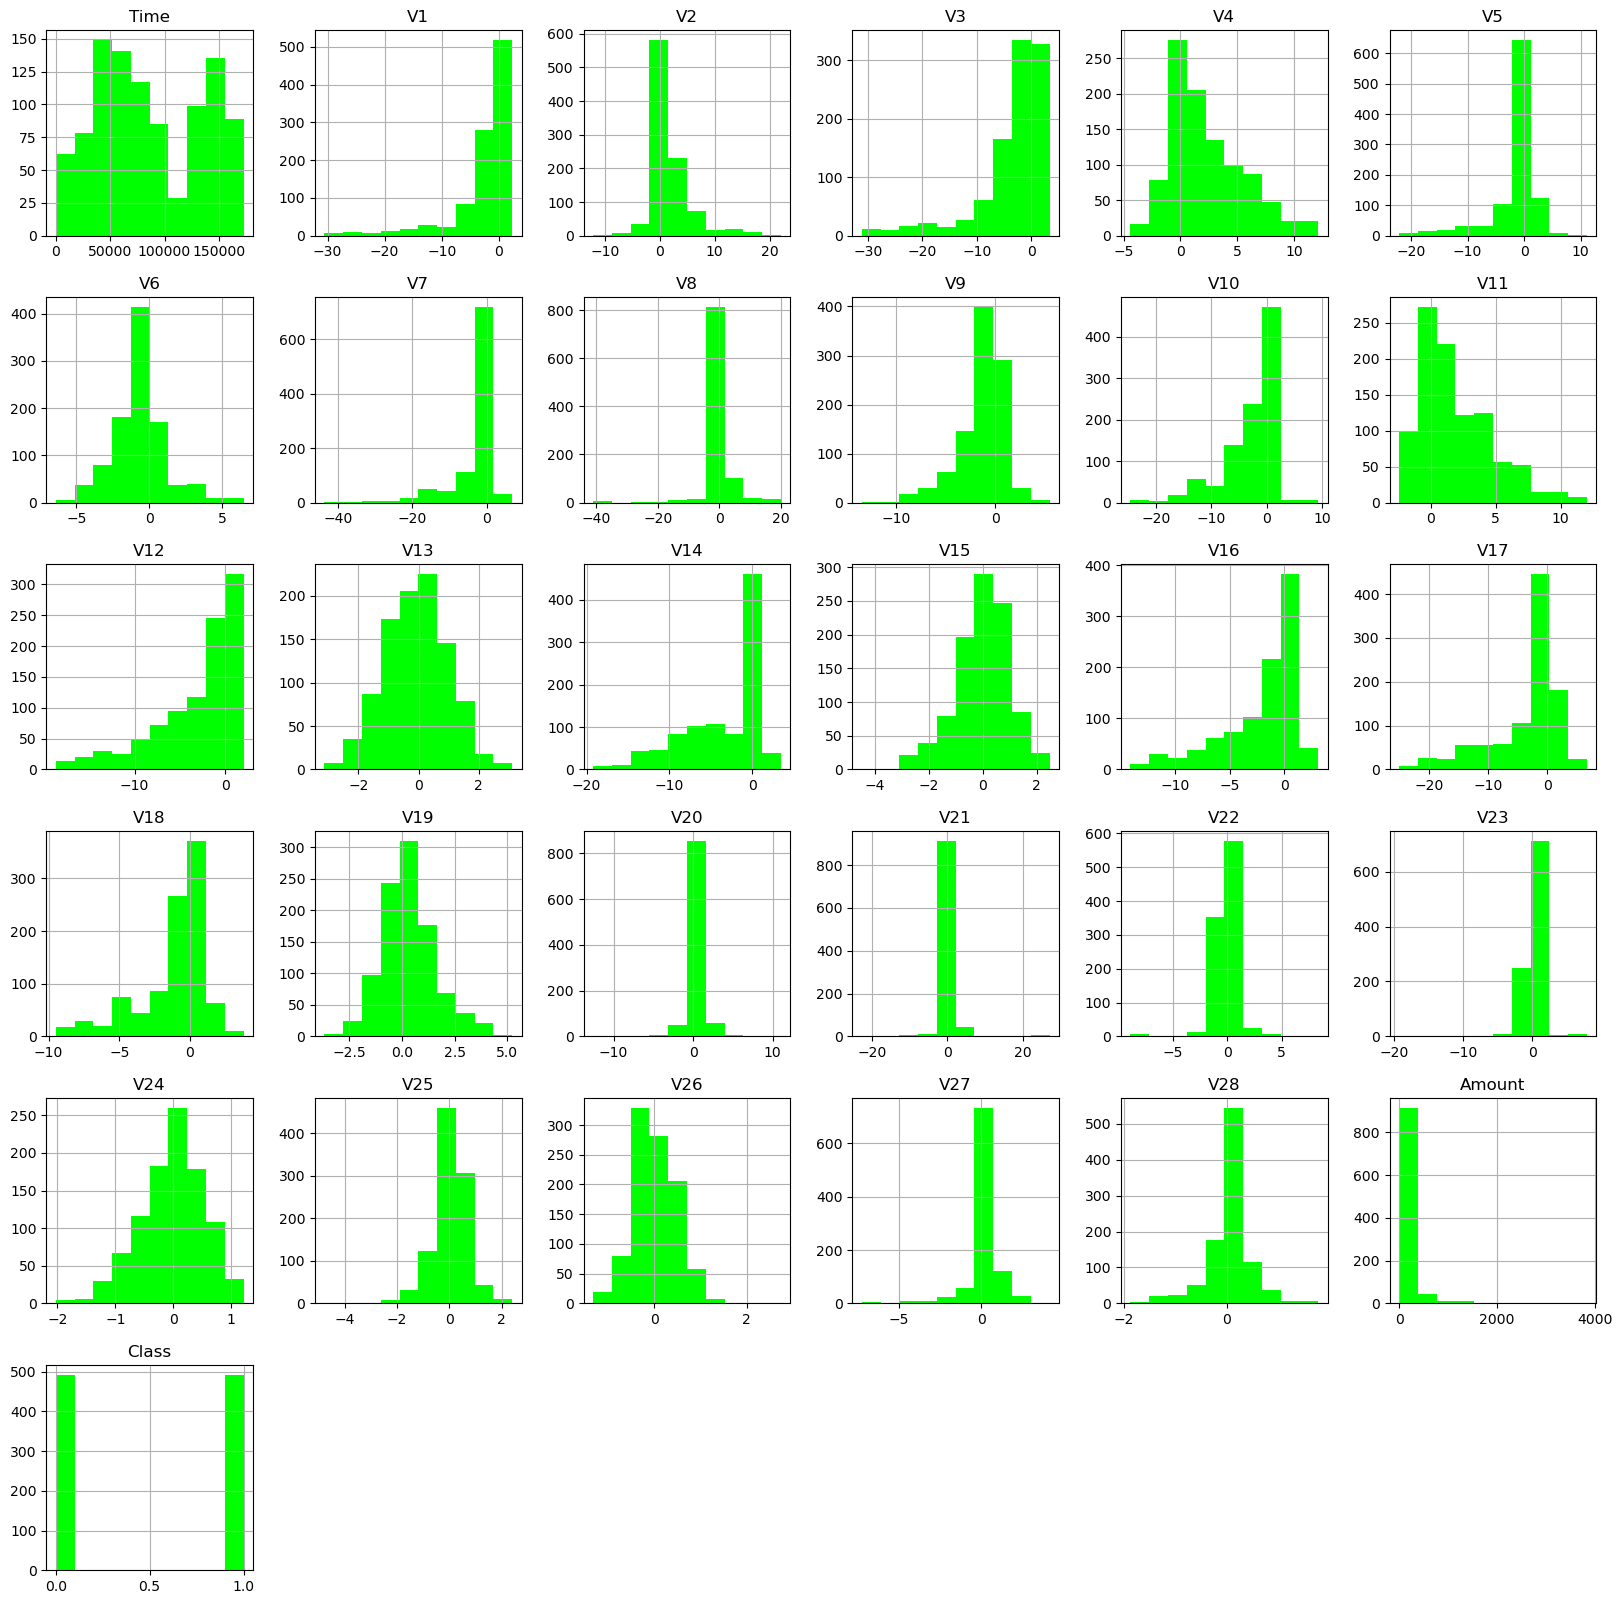

In [17]:
df.hist(figsize=(20,20),color='lime')
plt.show()

Scatter Plot

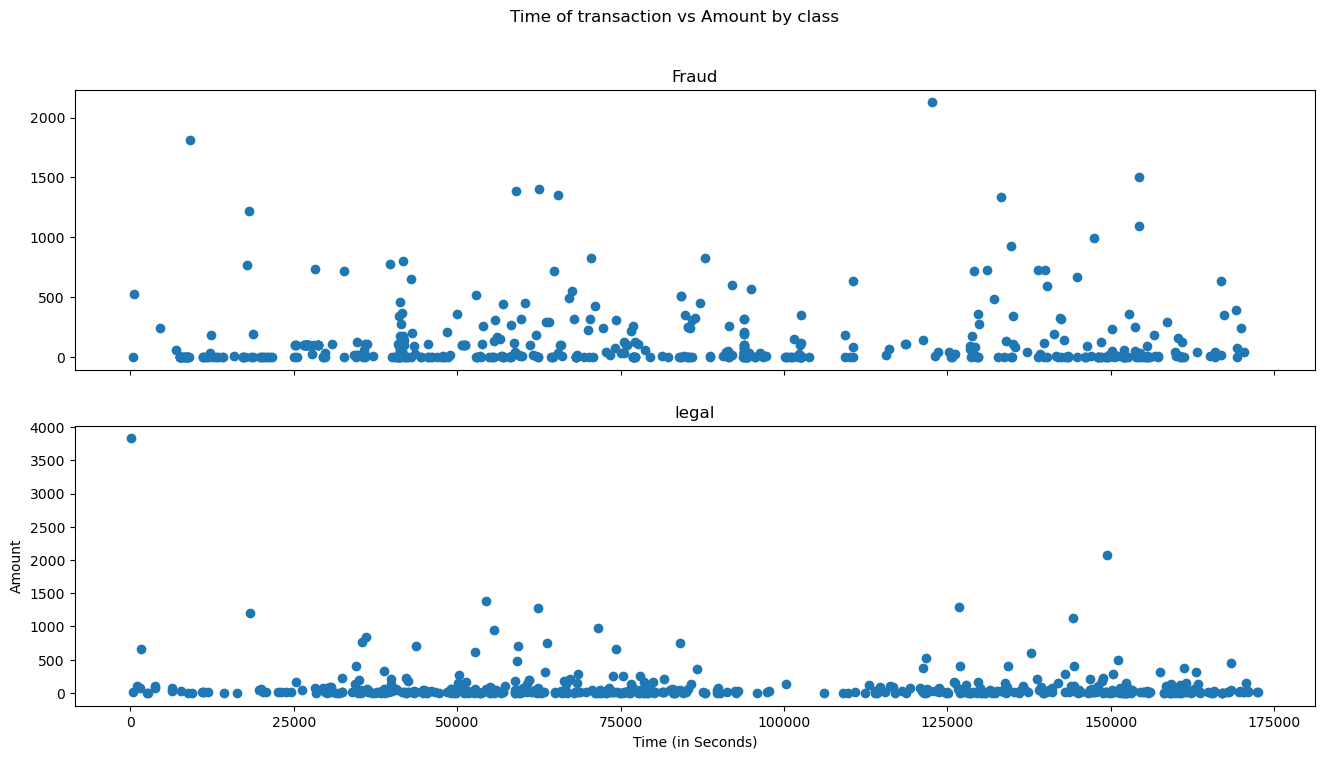

In [18]:
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legal.Time, legal.Amount)
ax2.set_title('legal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [19]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.233169,-0.195477,0.139088,-0.208431,0.280713,0.098652,0.207611,-0.143462,0.135941,...,-0.059498,0.138455,0.073417,-0.028236,-0.191577,-0.052778,-0.124693,-0.000527,-0.023801,-0.119675
V1,0.233169,1.000000,-0.798412,0.880689,-0.603643,0.866258,0.314928,0.878177,-0.078144,0.650864,...,0.014873,-0.044069,-0.055310,-0.068766,-0.087518,0.063557,0.184899,0.192979,-0.036455,-0.427196
V2,-0.195477,-0.798412,1.000000,-0.853101,0.668385,-0.785996,-0.310041,-0.849615,-0.018085,-0.688252,...,0.037037,0.002974,0.144963,-0.032423,0.111264,0.005393,-0.158283,0.000420,-0.265628,0.488662
V3,0.139088,0.880689,-0.853101,1.000000,-0.770648,0.854063,0.451846,0.889798,-0.170031,0.765625,...,0.024643,-0.063006,-0.036717,0.028469,-0.084976,-0.003600,0.103019,0.135195,-0.013057,-0.568682
V4,-0.208431,-0.603643,0.668385,-0.770648,1.000000,-0.589751,-0.438148,-0.710366,0.099103,-0.786617,...,-0.011478,0.118904,0.021818,-0.113401,-0.041316,0.126462,-0.024878,-0.080409,0.025457,0.713012
V5,0.280713,0.866258,-0.785996,0.854063,-0.589751,1.000000,0.316014,0.843594,-0.205427,0.655445,...,0.042542,-0.091143,-0.071696,-0.104279,-0.078014,0.053381,0.198440,0.165344,-0.102239,-0.380892
V6,0.098652,0.314928,-0.310041,0.451846,-0.438148,0.316014,1.000000,0.292632,-0.542464,0.364350,...,0.012843,-0.009017,0.286444,0.047980,-0.144263,-0.068614,-0.174295,-0.007681,0.194731,-0.417457
V7,0.207611,0.878177,-0.849615,0.889798,-0.710366,0.843594,0.292632,1.000000,0.089579,0.767913,...,0.037719,-0.125484,-0.102759,-0.027194,0.050084,0.023657,0.227205,0.168380,0.123310,-0.480833
V8,-0.143462,-0.078144,-0.018085,-0.170031,0.099103,-0.205427,-0.542464,0.089579,1.000000,-0.076319,...,-0.111617,0.029530,-0.429660,0.075733,0.226350,0.044670,0.281962,-0.012565,0.025887,0.051601
V9,0.135941,0.650864,-0.688252,0.765625,-0.786617,0.655445,0.364350,0.767913,-0.076319,1.000000,...,0.150142,-0.255170,-0.053090,0.042667,0.009666,-0.105984,0.132763,0.153857,0.029720,-0.556050


Model Building

## splitting the dataset into train set and test set

In [20]:
X=df.drop(['Class'],axis=1)

In [21]:
y=df['Class']

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

Logistic Regression

In [23]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
y_train_pred=logreg.predict(X_train)
Train_accuracy = accuracy_score(y_train,y_train_pred)
Test_accuracy=accuracy_score(y_test,y_pred)

print('Train Acc:',Train_accuracy)
print('Test Acc:',Test_accuracy)
print(76*"-")
print(classification_report(y_test,y_pred))

Train Acc: 0.9462209302325582
Test Acc: 0.9290540540540541
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       148
           1       0.95      0.91      0.93       148

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



Random Forest Classifier  

In [24]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
y_pred1=RFC.predict(X_test)
y_train_pred1=RFC.predict(X_train)
Train_accuracy1 = accuracy_score(y_train,y_train_pred1)
Test_accuracy1 =accuracy_score(y_test,y_pred1)

print('Train Accuracy:',Train_accuracy1*100)
print('Test Accuracy:',Test_accuracy1*100)
print(76*"-")
print(classification_report(y_test,y_pred1))

Train Accuracy: 100.0
Test Accuracy: 94.25675675675676
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.99      0.94       148
           1       0.99      0.90      0.94       148

    accuracy                           0.94       296
   macro avg       0.95      0.94      0.94       296
weighted avg       0.95      0.94      0.94       296



Decision Tree Classifier

In [25]:
DTC= DecisionTreeClassifier()
DTC.fit(X_train,y_train)
y_pred2=DTC.predict(X_test)
y_train_pred2=DTC.predict(X_train)
Train_accuracy2 = accuracy_score(y_train,y_train_pred2)
Test_accuracy2 =accuracy_score(y_test,y_pred2)

print('Train Accuracy:',Train_accuracy2*100)
print('Test Accuracy:',Test_accuracy2*100)
print(76*"-")
print(classification_report(y_test,y_pred2))

Train Accuracy: 100.0
Test Accuracy: 92.56756756756756
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       148
           1       0.93      0.93      0.93       148

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



Conculsion: - The order of the ✅Best Models from top to bottom:  LogisticRegression 